## **Milestone 1: Data Collection, Exploration, and Preprocessing**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df_train = pd.read_csv("D:/Programming/Projects/3- Customer Churn Prediction/Datasets/train.csv")
df_test = pd.read_csv("D:/Programming/Projects/3- Customer Churn Prediction/Datasets/test.csv")

In [118]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [119]:
df_train.shape

(165034, 14)

In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [121]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Handle Missing Values:**

In [122]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Handle Duplicated:**

In [123]:
df_train.duplicated().sum()

0

**Handle Outliers:**

In [124]:
numeric_cols = [col for col in df_train.columns if df_train[col].dtypes != 'O']
categorical_cols = [col for col in df_train.columns if df_train[col].dtypes == 'O']

In [125]:
outliers_summary = {}
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    Q1 = df_train[col].quantile(0.25)  
    Q3 = df_train[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: CreditScore, Outliers: 253
Column: Age, Outliers: 6394
Column: Tenure, Outliers: 0
Column: Balance, Outliers: 0
Column: EstimatedSalary, Outliers: 0


In [126]:
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    Q1 = df_train[col].quantile(0.25)  
    Q3 = df_train[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_train = df_train[(df_train[col] >= lower_bound) & (df_train[col] <= upper_bound)]

In [127]:
df_train.shape

(158400, 14)

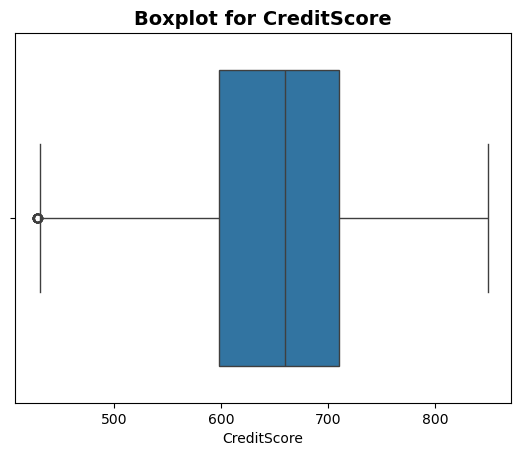

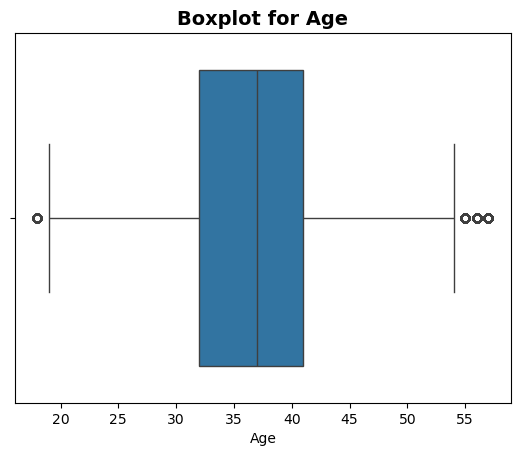

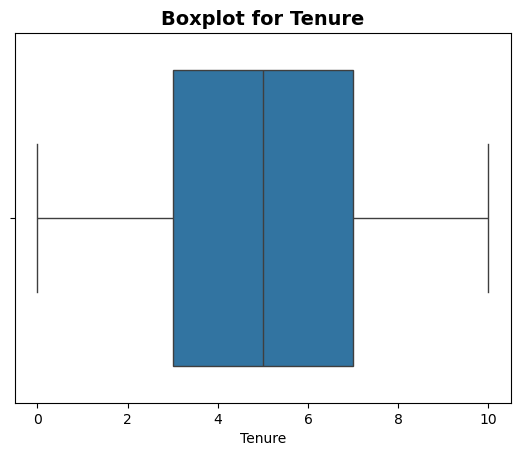

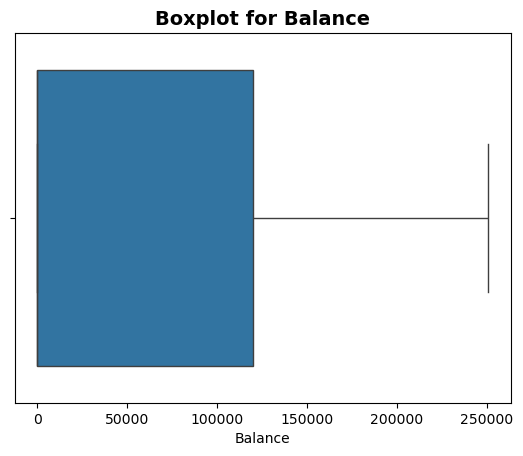

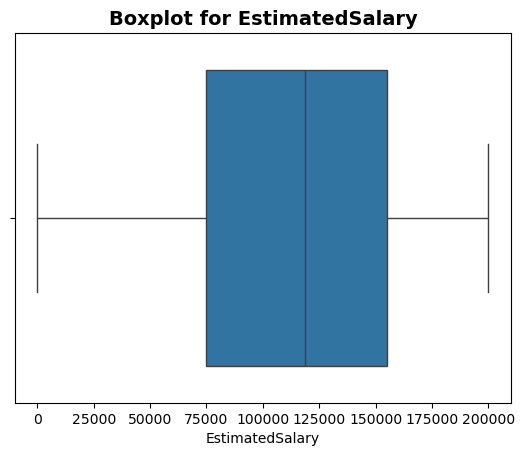

In [128]:
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    sns.boxplot(x = df_train[col])
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.show()

In [129]:
df_train.to_csv("cleaned_data.csv", index=False)

In [130]:
df_train.drop(["id","CustomerId","Surname"], axis=1, inplace=True)

**Encoding and Scaling:**

In [131]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [132]:
# label encoding
df_train["Gender"] = df_train["Gender"].map({"Male": 0, "Female": 1})

# one-hot encoding
df_encoded = pd.get_dummies(df_train, columns=["Geography"], drop_first=True)
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,668,0,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False
1,627,0,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False
2,678,0,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False
3,581,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False
4,716,0,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True


In [133]:
df_encoded.to_csv("encoded_data.csv", index=False)

In [134]:
# feature scaling
from sklearn.preprocessing import StandardScaler
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.140430,0,-0.558113,-0.721924,-0.880520,0.812555,1.0,0.0,1.368262,0,False,False
1,-0.375705,0,-0.558113,-1.435221,-0.880520,0.812555,1.0,1.0,-1.259511,0,False,False
2,0.266316,0,0.392022,1.774613,-0.880520,0.812555,1.0,0.0,1.436307,0,False,False
3,-0.954783,0,-0.422380,-1.078573,1.491077,-1.022654,1.0,1.0,-0.561328,0,False,False
4,0.744685,0,-0.558113,-0.008628,-0.880520,0.812555,1.0,1.0,-1.945293,0,False,True


In [135]:
df_scaled.to_csv("scaled_data.csv", index=False)